**Problem Statement**:
The objective is to develop a machine learning model that can predict the power consumption (Zone 1 Power Consumption) of Wellington, New Zealand based on various environmental and meteorological factors. The goal is to create an accurate predictive model that can assist in managing energy resources efficiently and optimizing power consumption in that zone.

### Data Dictionary

- **Sr no**. Serial Number
- **Temperature:** The temperature in Celsius at the specific location.
- **Humidity:** The relative humidity percentage at the location. (g.m-3, i.e. units of grams of water vapor per cubic meter of air. )
- **Wind Speed:** The speed of the wind at the location. (nautical mile per hour )
- **General Diffuse Flows:** Refer to a specific measurement or calculation related to the amount or intensity of diffuse solar radiation in a particular area. (Mtr sqr per sec )
- **Diffuse Flows:** The measure of diffuse solar radiation. (Mtr sqr per sec )
- **Air Quality Index:** An index representing the air quality in the area. (particles in micrograms per cubic meter. )
- **Cloudiness:** The level of cloud cover or cloudiness at the location. (1-Yes,0-No)
- **Zone 1 Power Consumption:** The power consumption in the specific zone, which is the target variable to be predicted. (in KWR- Target value)

# data loading and exploring

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Data.csv")
df

,S no,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Air Quality Index (PM),Cloudiness,Power Consumption in A Zone
0,1,6.559,73.8,0.083,0.051,0.119,158.0,1,34055.69620
1,2,6.414,74.5,0.083,0.070,0.085,159.0,1,29814.68354
2,3,6.313,74.5,0.08,0.062,0.100,151.0,1,29128.10127
3,4,6.121,75,0.083,0.091,0.096,151.0,1,28228.86076
4,5,5.921,75.7,0.081,0.048,0.085,154.0,1,27335.69620
...,...,...,...,...,...,...,...,...,...
52578,52579,NaN,75.6,0.094,436.200,38.960,157.0,0,34444.55696
52579,52580,NaN,73.5,0.089,451.600,37.730,157.0,0,34438.48101
52580,52581,NaN,70.1,0.085,466.400,37.490,157.0,0,33873.41772
52581,52582,NaN,67.75,0.086,477.000,37.370,152.0,0,33988.86076


In [10]:
print("First 5 rows of the dataset:")
print(df.head())



First 5 rows of the dataset:
   S no Temperature Humidity Wind Speed  general diffuse flows  diffuse flows  \
0     1       6.559     73.8      0.083                  0.051          0.119   
1     2       6.414     74.5      0.083                  0.070          0.085   
2     3       6.313     74.5       0.08                  0.062          0.100   
3     4       6.121       75      0.083                  0.091          0.096   
4     5       5.921     75.7      0.081                  0.048          0.085   

   Air Quality Index (PM)  Cloudiness   Power Consumption in A Zone  
0                   158.0           1                   34055.69620  
1                   159.0           1                   29814.68354  
2                   151.0           1                   29128.10127  
3                   151.0           1                   28228.86076  
4                   154.0           1                   27335.69620  


In [6]:
print("\nDataset shape (rows, columns):")
print(df.shape)




Dataset shape (rows, columns):
(52583, 9)


In [12]:
print("\nSummary statistics for numerical features:")
print(df.describe())





Summary statistics for numerical features:
               S no  general diffuse flows  diffuse flows  \
count  52583.000000           52275.000000   52568.000000   
mean   26292.000000             182.964247      74.872330   
std    15179.548939             264.571351     124.084858   
min        1.000000               0.004000       0.011000   
25%    13146.500000               0.062000       0.122000   
50%    26292.000000               5.226000       4.412000   
75%    39437.500000             320.100000     100.500000   
max    52583.000000            1163.000000     936.000000   

       Air Quality Index (PM)    Cloudiness   Power Consumption in A Zone  
count            52565.000000  52583.000000                  52583.000000  
mean               154.499191      0.009338                  31061.821779  
std                  2.871553      0.096180                   8021.057455  
min                150.000000      0.000000                   9457.750760  
25%                152.000

In [7]:
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64


In [9]:

print("\nData types of each column:")
print(df.dtypes)


Data types of each column:
S no                              int64
Temperature                      object
Humidity                         object
Wind Speed                       object
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object


## Handling the missing values

In [14]:
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
S no                              0
Temperature                     320
Humidity                         25
Wind Speed                       71
general diffuse flows           308
diffuse flows                    15
Air Quality Index (PM)           18
Cloudiness                        0
 Power Consumption in A Zone      0
dtype: int64


In [16]:
for col in ['Temperature', 'Humidity', 'Wind Speed']:
    df[col] = df[col].replace('[^0-9.]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [19]:
numerical_columns = ['Temperature', 'Humidity', 'Wind Speed', 'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [21]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
S no                            0
Temperature                     0
Humidity                        0
Wind Speed                      0
general diffuse flows           0
diffuse flows                   0
Air Quality Index (PM)          0
Cloudiness                      0
 Power Consumption in A Zone    0
dtype: int64


In [23]:
print("\nData types after conversion:")
print(df.dtypes)


Data types after conversion:
S no                              int64
Temperature                     float64
Humidity                        float64
Wind Speed                      float64
general diffuse flows           float64
diffuse flows                   float64
Air Quality Index (PM)          float64
Cloudiness                        int64
 Power Consumption in A Zone    float64
dtype: object


In [25]:
# Display the preprocessed data
print("\nPreprocessed Data:")
print(df.head())


Preprocessed Data:
   S no  Temperature  Humidity  Wind Speed  general diffuse flows  \
0     1        6.559      73.8       0.083                  0.051   
1     2        6.414      74.5       0.083                  0.070   
2     3        6.313      74.5       0.080                  0.062   
3     4        6.121      75.0       0.083                  0.091   
4     5        5.921      75.7       0.081                  0.048   

   diffuse flows  Air Quality Index (PM)  Cloudiness  \
0          0.119                   158.0           1   
1          0.085                   159.0           1   
2          0.100                   151.0           1   
3          0.096                   151.0           1   
4          0.085                   154.0           1   

    Power Consumption in A Zone  
0                   34055.69620  
1                   29814.68354  
2                   29128.10127  
3                   28228.86076  
4                   27335.69620  


In [18]:
df.columns

Index(['S no', 'Temperature', 'Humidity', 'Wind Speed',
       'general diffuse flows', 'diffuse flows', 'Air Quality Index (PM)',
       'Cloudiness', ' Power Consumption in A Zone'],
      dtype='object')

## Visualization of the preprocessed data - EDA

In [26]:
sns.set(style="whitegrid")

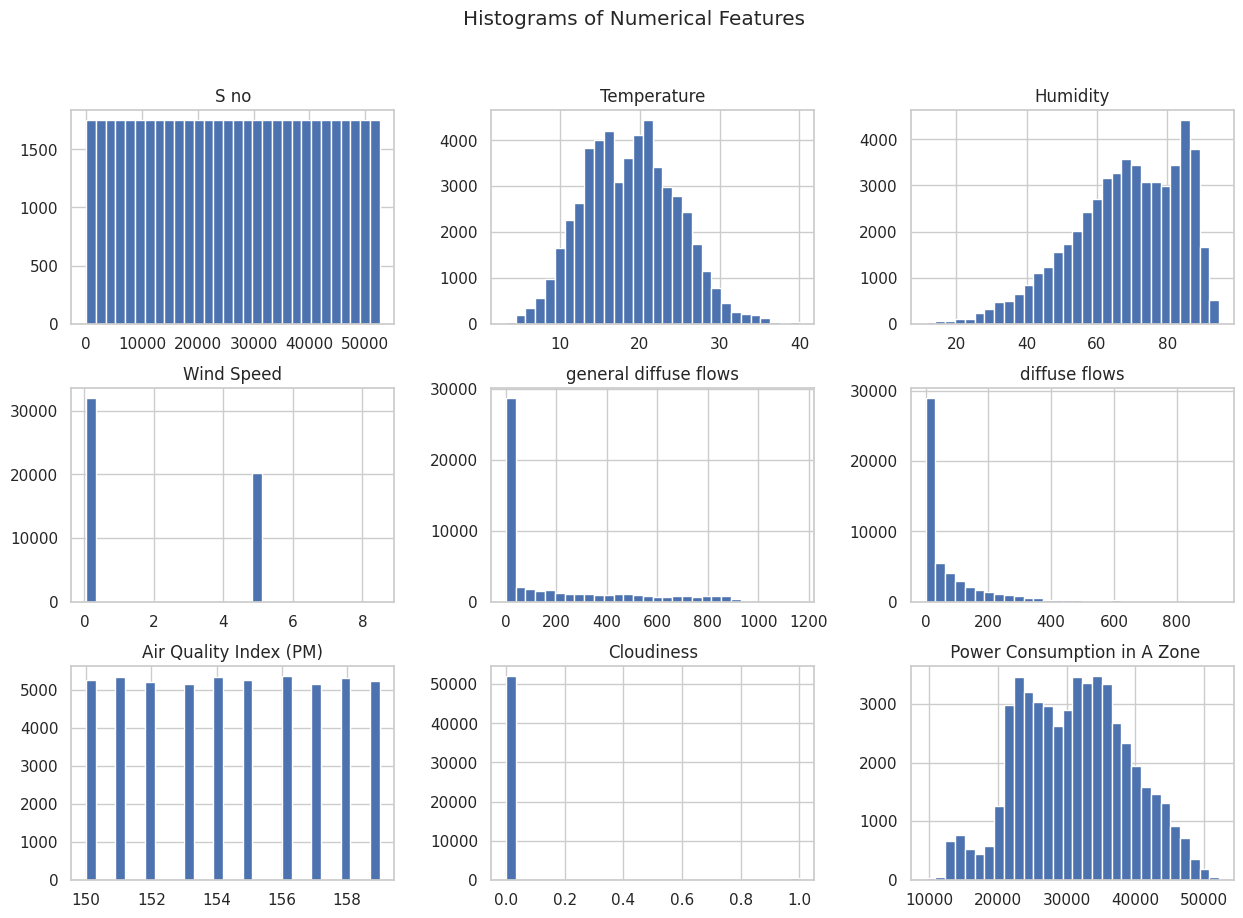

In [27]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numerical Features")
plt.show()

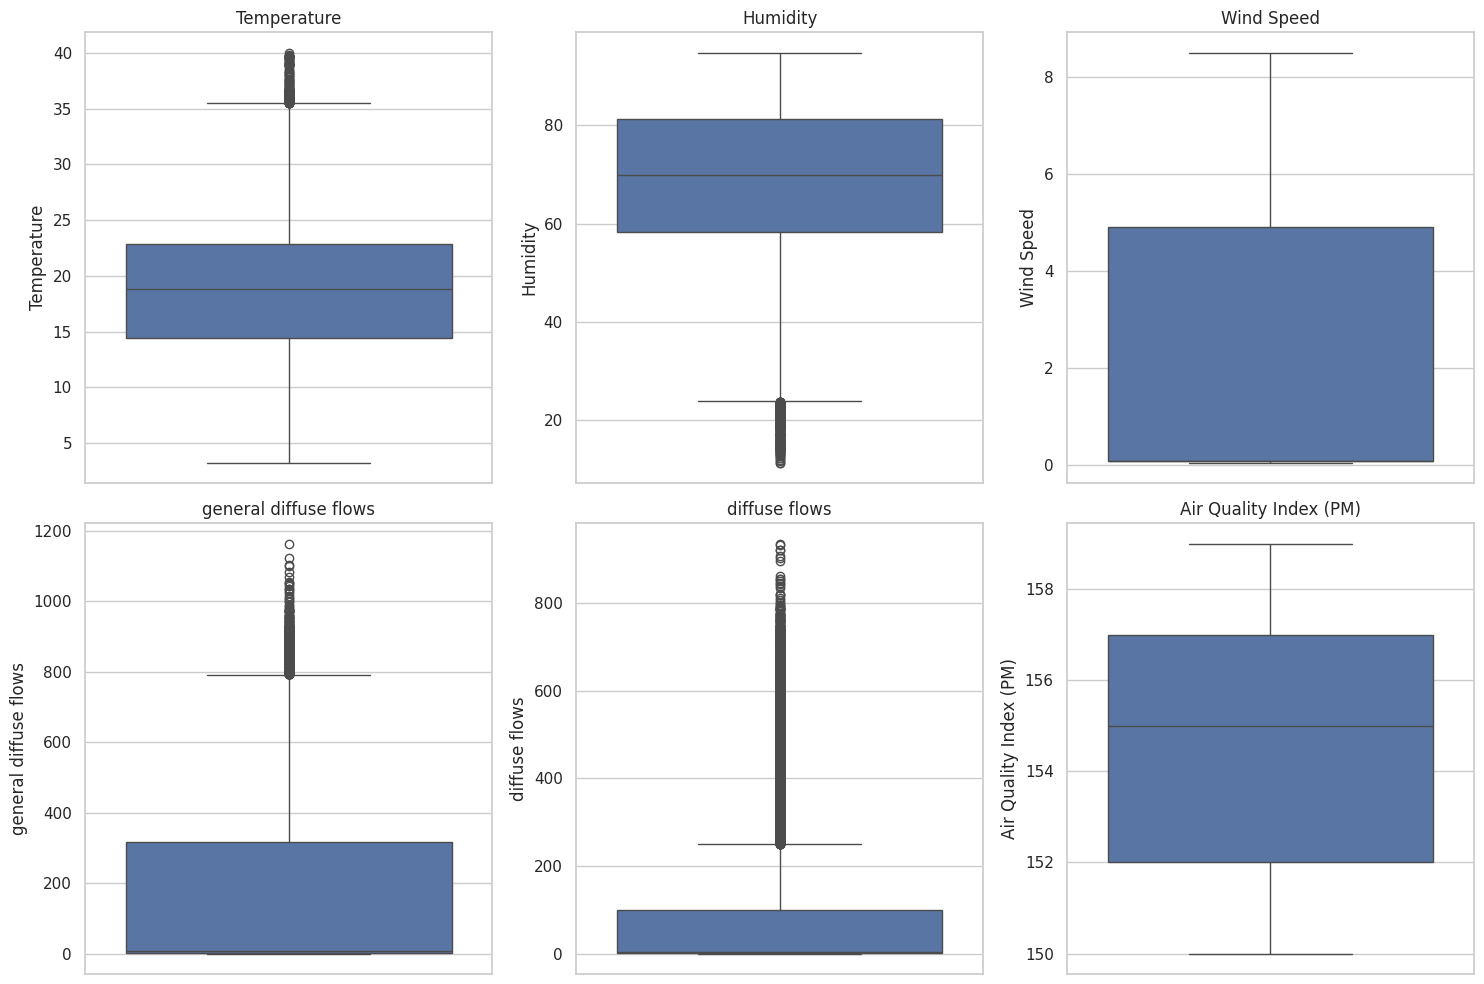

In [28]:

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

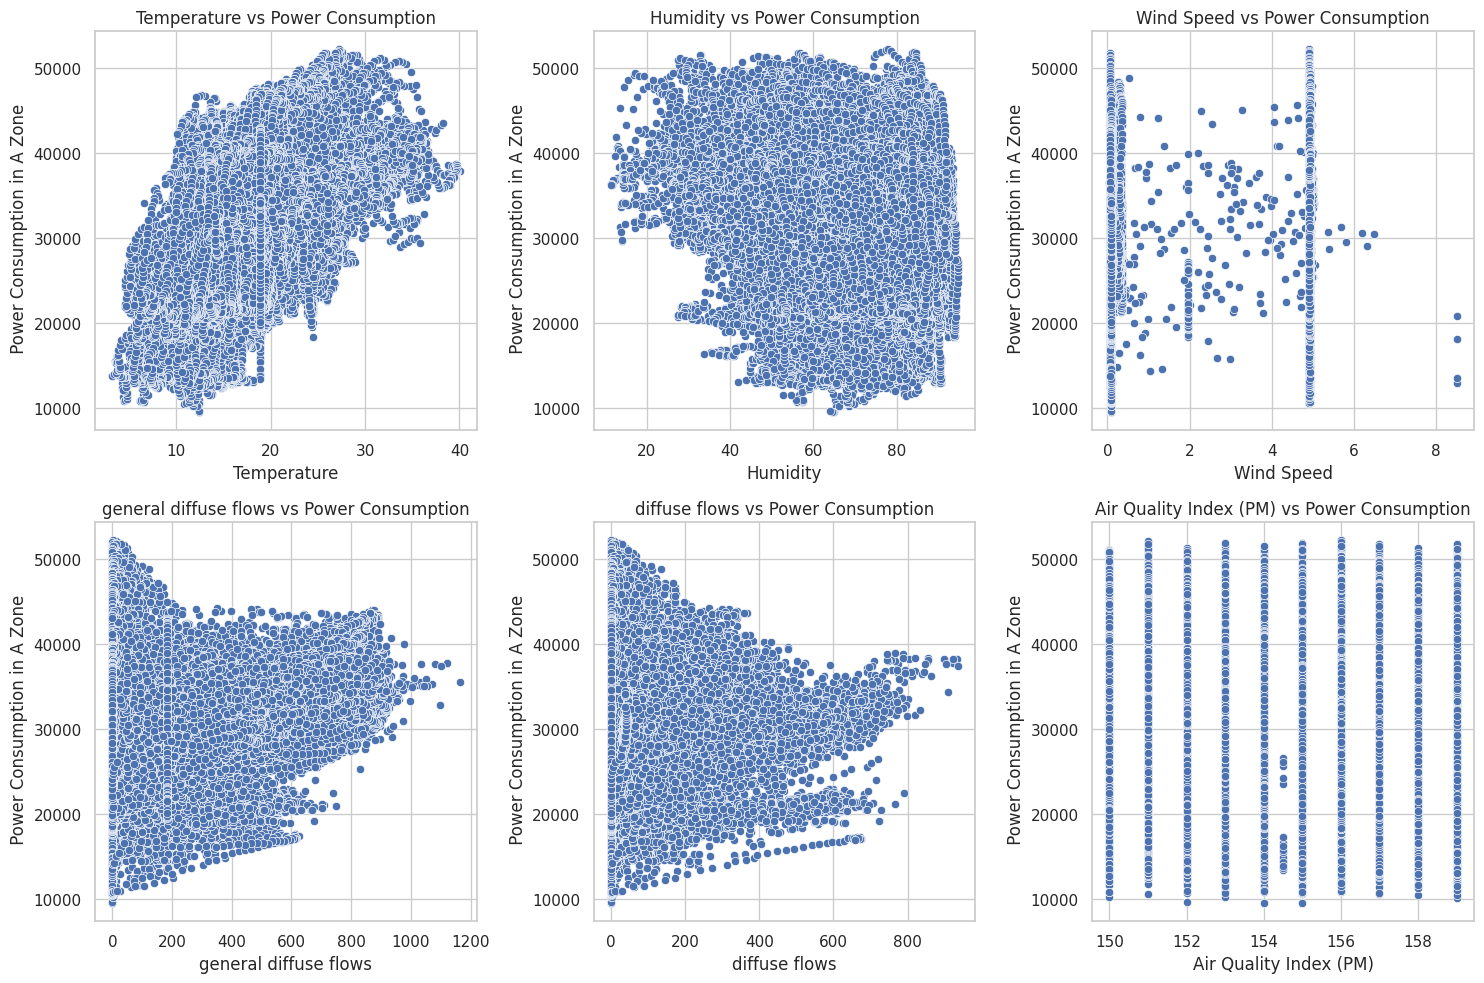

In [30]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df[' Power Consumption in A Zone'])
    plt.title(f"{col} vs Power Consumption")
plt.tight_layout()
plt.show()


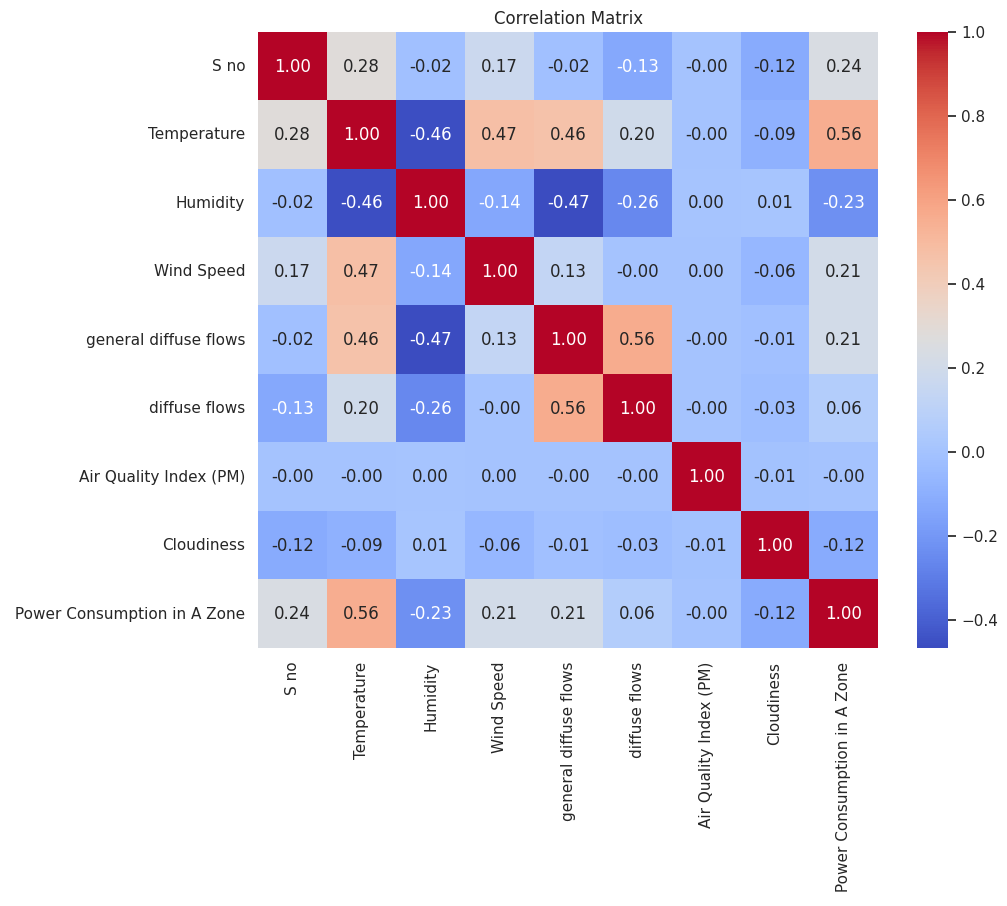

In [31]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

<ipython-input-32-4bd0f95301eb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cloudiness', data=df, palette='Set2')


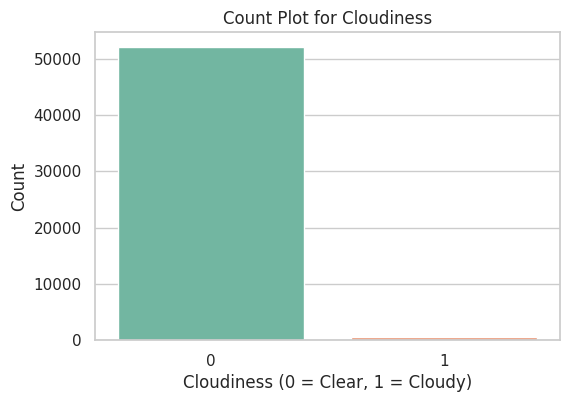

In [32]:

plt.figure(figsize=(6, 4))
sns.countplot(x='Cloudiness', data=df, palette='Set2')
plt.title("Count Plot for Cloudiness")
plt.xlabel("Cloudiness (0 = Clear, 1 = Cloudy)")
plt.ylabel("Count")
plt.show()

<ipython-input-34-cdf142196dfc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Air Quality Index (PM)', data=df, palette='viridis')


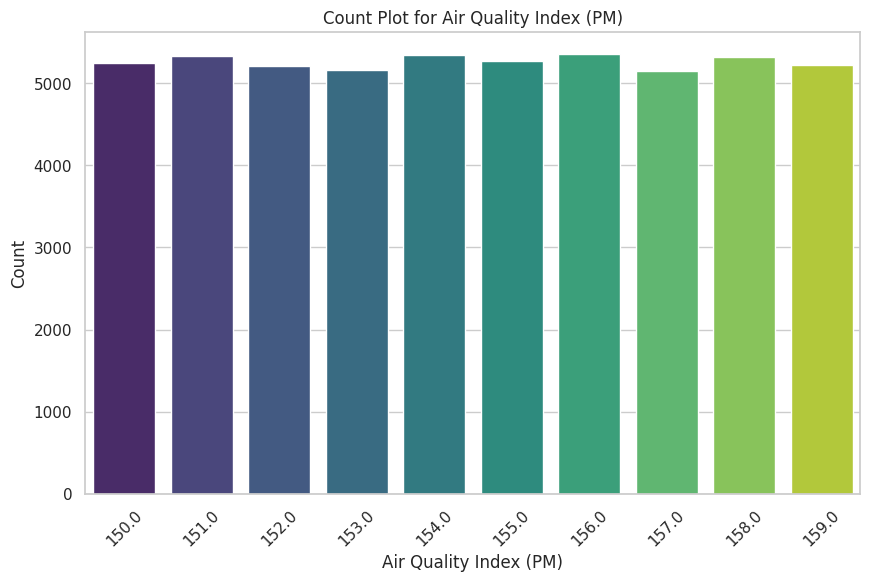

In [34]:
df['Air Quality Index (PM)'] = df['Air Quality Index (PM)'].round()
plt.figure(figsize=(10, 6))
sns.countplot(x='Air Quality Index (PM)', data=df, palette='viridis')
plt.title("Count Plot for Air Quality Index (PM)")
plt.xlabel("Air Quality Index (PM)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

<ipython-input-36-a67ab8ac99db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


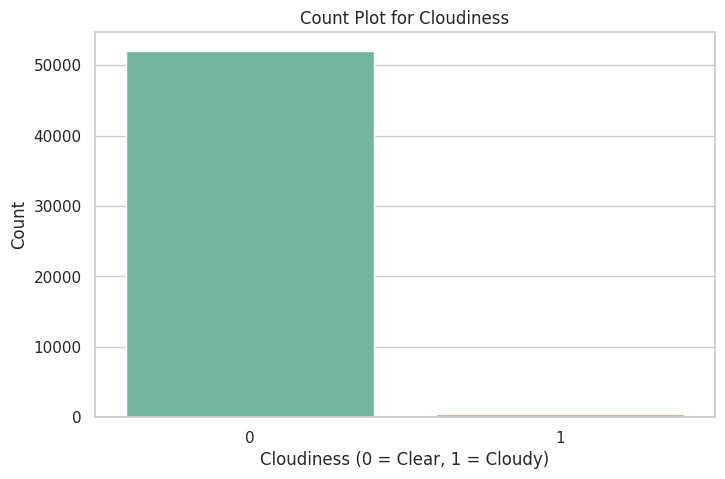

<ipython-input-36-a67ab8ac99db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


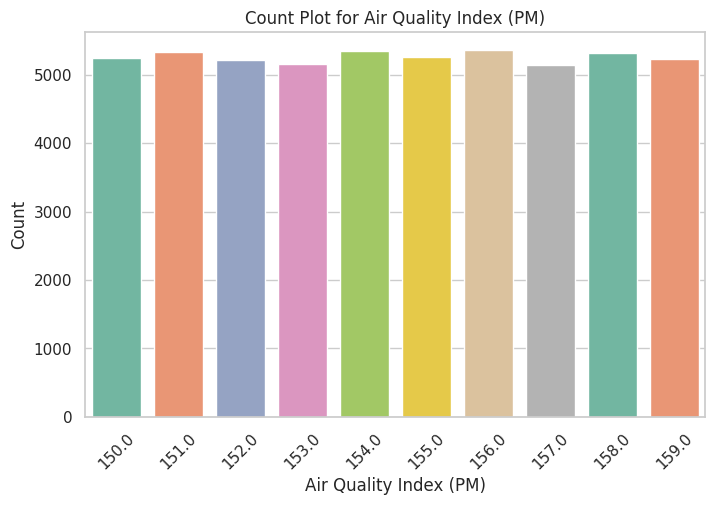

<ipython-input-36-a67ab8ac99db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


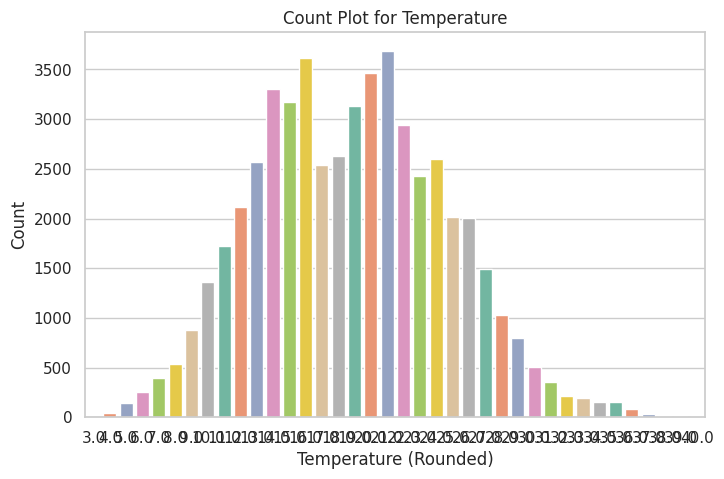

<ipython-input-36-a67ab8ac99db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


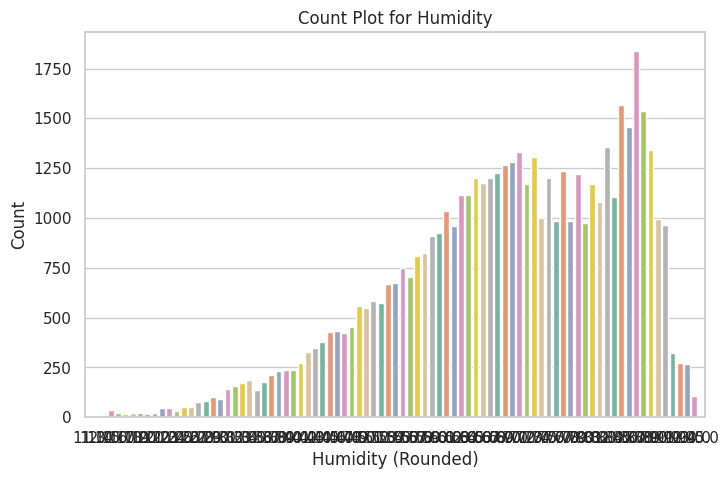

<ipython-input-36-a67ab8ac99db>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=column, data=df, palette='Set2')


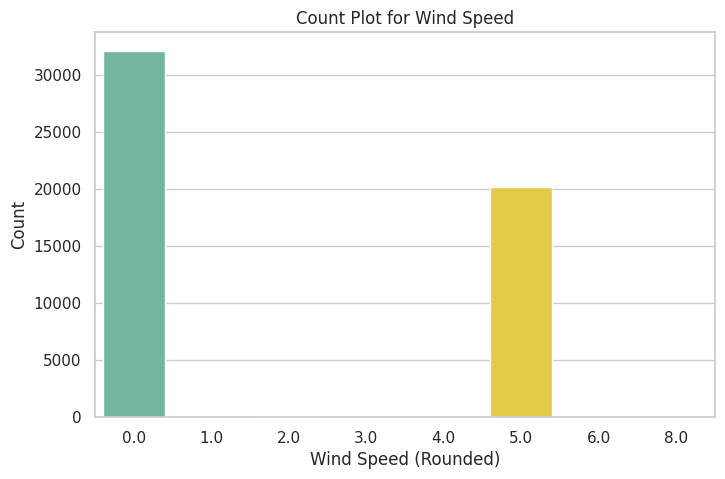

In [36]:

def plot_countplot(column, title, xlabel, ylabel="Count", rotation=0):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=column, data=df, palette='Set2')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=rotation)
    plt.show()


plot_countplot('Cloudiness', "Count Plot for Cloudiness", "Cloudiness (0 = Clear, 1 = Cloudy)")


df['Air Quality Index (PM)'] = df['Air Quality Index (PM)'].round()
df['Temperature'] = df['Temperature'].round()
df['Humidity'] = df['Humidity'].round()
df['Wind Speed'] = df['Wind Speed'].round()

plot_countplot('Air Quality Index (PM)', "Count Plot for Air Quality Index (PM)", "Air Quality Index (PM)", rotation=45)
plot_countplot('Temperature', "Count Plot for Temperature", "Temperature (Rounded)")
plot_countplot('Humidity', "Count Plot for Humidity", "Humidity (Rounded)")
plot_countplot('Wind Speed', "Count Plot for Wind Speed", "Wind Speed (Rounded)")

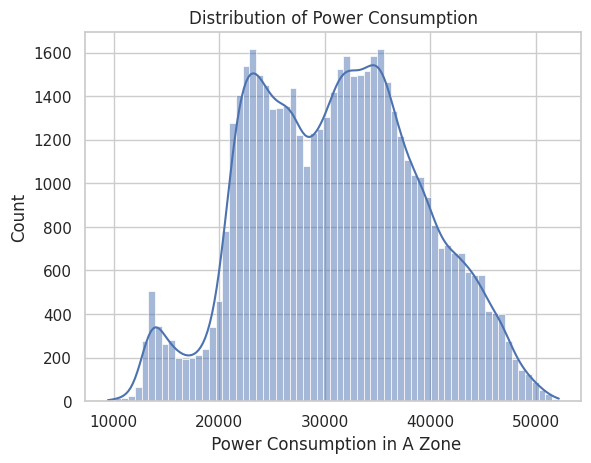

In [37]:
sns.histplot(df[' Power Consumption in A Zone'], kde=True)
plt.title('Distribution of Power Consumption')
plt.show()

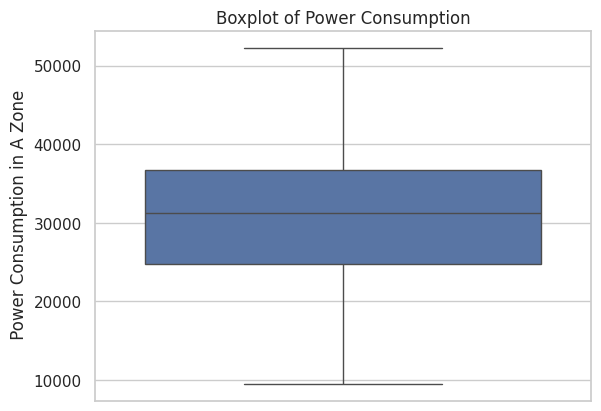

In [39]:
sns.boxplot(df[' Power Consumption in A Zone'])
plt.title('Boxplot of Power Consumption')
plt.show()

A normal distribution (bell-shaped curve) indicates that your target variable ("Power Consumption in A Zone") is symmetrically distributed around the mean.

Most of the data points are clustered around the central value, with fewer points as you move away from the mean.

##Feature Scaling

In [41]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [42]:
from sklearn.model_selection import train_test_split

In [46]:
# Linear Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Tree-Based Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Support Vector Machine (SVM)
from sklearn.svm import SVR

# Advanced Models (XGBoost, LightGBM, CatBoost)
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [44]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [49]:
X = df.drop(columns=[' Power Consumption in A Zone'])
y = df[' Power Consumption in A Zone']


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Model Building

### Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [95]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Linear Regression Results:')
print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R² Score:', r2)

Linear Regression Results:
Mean Absolute Error (MAE): 2929.2334852307004
Mean Squared Error (MSE): 16288157.805060728
R² Score: 0.7478601252917314


## Ridge Regression

In [54]:
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

Ridge()

In [93]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Ridge Regression Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)


Ridge Regression Results:
MAE: 2929.2334852307004
MSE: 16288157.805060728
R²: 0.7478601252917314


## Lasso Regression

In [57]:
model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

Lasso()

In [80]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Lasso Regression Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

Lasso Regression Results:
MAE: 2929.2334852307004
MSE: 16288157.805060728
R²: 0.7478601252917314


## ElasticNet

In [99]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train, y_train)

ElasticNet()

In [100]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('ElasticNet Regression Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

ElasticNet Regression Results:
MAE: 5450.364260564127
MSE: 45614284.78118261
R²: 0.2938931346759637


## Decision Tree

In [62]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [63]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Decision Tree Regressor Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

Decision Tree Regressor Results:
MAE: 1297.6944494472757
MSE: 8491273.4495659
R²: 0.8685555082833254


## Random Forest Regressor

In [83]:
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [84]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Random Forest Regressor Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

Random Forest Regressor Results:
MAE: 1195.3572870097319
MSE: 3964450.456471164
R²: 0.9386305036244674


In [114]:
from sklearn.ensemble import AdaBoostRegressor
base_estimator = DecisionTreeRegressor(max_depth=3)
model = AdaBoostRegressor(
    estimator=base_estimator,
    n_estimators=50,
    random_state=42
)
model.fit(X_train, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), random_state=42)

In [115]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('AdaBoost Regressor Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

AdaBoost Regressor Results:
MAE: 4996.029135230518
MSE: 37111352.03709005
R²: 0.42551811169345144


## Gradient Boosting

In [101]:
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [102]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Gradient Boosting Regressor Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

Gradient Boosting Regressor Results:
MAE: 4109.390771457568
MSE: 27648578.73327826
R²: 0.5720013729542517


## SVM

In [70]:
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

SVR()

In [103]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('SVR Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

SVR Results:
MAE: 4109.390771457568
MSE: 27648578.73327826
R²: 0.5720013729542517


## XGBoost Regressor

In [88]:
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [89]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('XGBoost Regressor Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

XGBoost Regressor Results:
MAE: 2648.5144920623156
MSE: 14075018.627812011
R²: 0.7821194099537498


## LightGBM Regressor

In [105]:
model = LGBMRegressor(random_state=42)
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001119 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 42066, number of used features: 8
[LightGBM] [Info] Start training from score 31058.113378


LGBMRegressor(random_state=42)

In [106]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('LightGBM Regressor Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

LightGBM Regressor Results:
MAE: 3189.322155555102
MSE: 18372342.02550262
R²: 0.7155970569631636


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


## CatBoost Regressor

In [91]:
model = CatBoostRegressor(random_state=42, verbose=0)  # Set verbose=0 to suppress training logs
model.fit(X_train, y_train)

In [92]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('CatBoost Regressor Results:')
print('MAE:', mae)
print('MSE:', mse)
print('R²:', r2)

CatBoost Regressor Results:
MAE: 2929.2334852307004
MSE: 16288157.805060728
R²: 0.7478601252917314


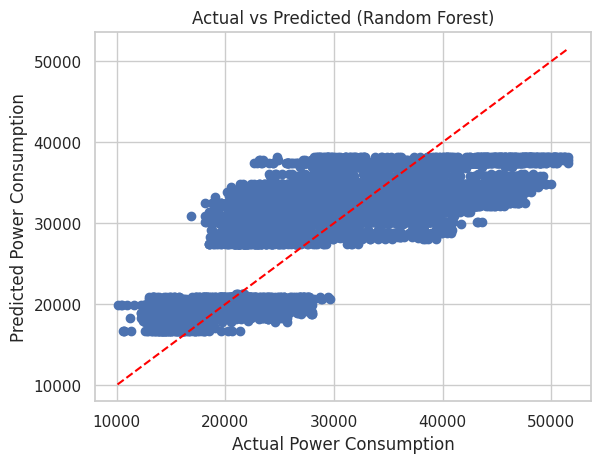

In [118]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Power Consumption')
plt.ylabel('Predicted Power Consumption')
plt.title('Actual vs Predicted (Random Forest)')
plt.show()

# Results from all models

Results Table (Sorted by R² Score):
                          Model      R²
5       Random Forest Regressor  0.9386
4       Decision Tree Regressor  0.8686
9             XGBoost Regressor  0.7821
10           LightGBM Regressor  0.7821
0             Linear Regression  0.7479
1              Ridge Regression  0.7479
2              Lasso Regression  0.7479
11           CatBoost Regressor  0.7479
6   Gradient Boosting Regressor  0.5720
8                           SVR  0.5720
7            AdaBoost Regressor  0.4255
3         ElasticNet Regression  0.2939


<ipython-input-123-1b992350cadd>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')


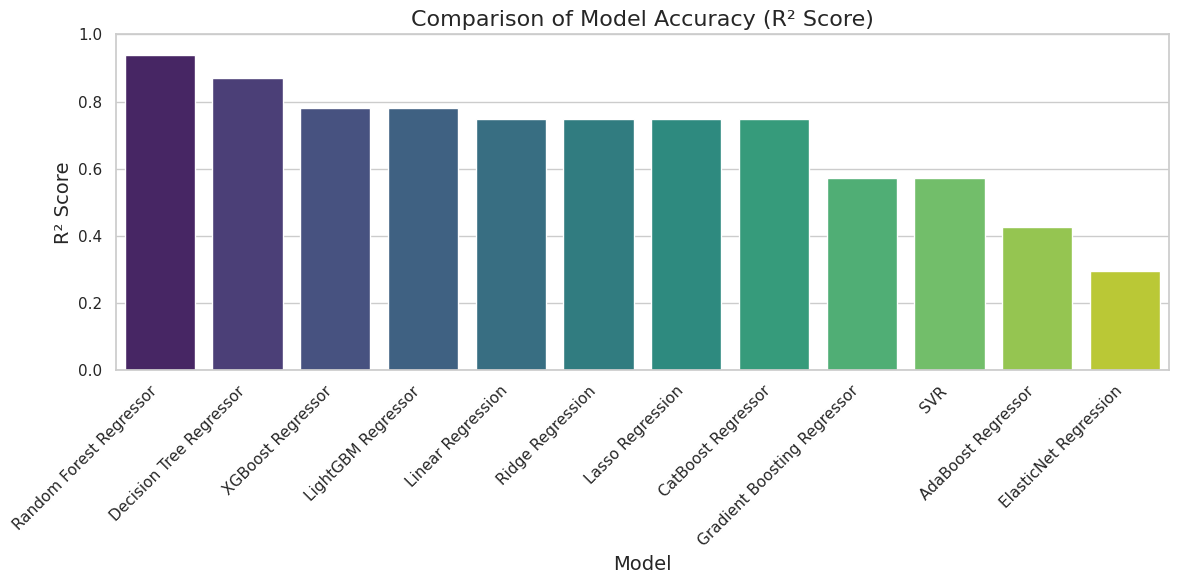

In [123]:
results = {
    'Model': ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet Regression',
              'Decision Tree Regressor', 'Random Forest Regressor', 'Gradient Boosting Regressor',
              'AdaBoost Regressor', 'SVR', 'XGBoost Regressor', 'LightGBM Regressor', 'CatBoost Regressor'],
    'R²': [0.7479, 0.7479, 0.7479, 0.2939, 0.8686, 0.9386, 0.5720, 0.4255, 0.5720, 0.7821, 0.7821, 0.7479]
}
results_df = pd.DataFrame(results)

results_df = results_df.sort_values(by='R²', ascending=False)

print("Results Table (Sorted by R² Score):")
print(results_df)
plt.figure(figsize=(12, 6))
sns.barplot(x='Model', y='R²', data=results_df, palette='viridis')
plt.title('Comparison of Model Accuracy (R² Score)', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R² Score', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

Based on the results, the **Random Forest Regressor** emerges as the best-performing model with the **highest R² score (0.9386)**, the **lowest MAE (1195.36)**, and the **lowest MSE (3964450.46)**. This indicates that it explains the most variance in the target variable and provides the most accurate predictions. The **Decision Tree Regressor** also performs well, ranking second with an R² score of **0.8686**, but it is slightly less accurate than Random Forest. Among the boosting algorithms, **XGBoost** and **LightGBM** show competitive performance with R² scores of **0.7821**, while **Linear Regression, Ridge Regression, Lasso Regression, and CatBoost** perform moderately with R² scores of **0.7479**. On the other hand, **ElasticNet Regression** performs poorly, with the **lowest R² score (0.2939)** and the highest errors, making it unsuitable for this dataset. In conclusion, **Random Forest** is the most reliable model for predicting power consumption, and further improvements can be achieved through hyperparameter tuning and feature engineering.